In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from sklearn import preprocessing
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import MeanShift
import requests

In [ ]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 1.1

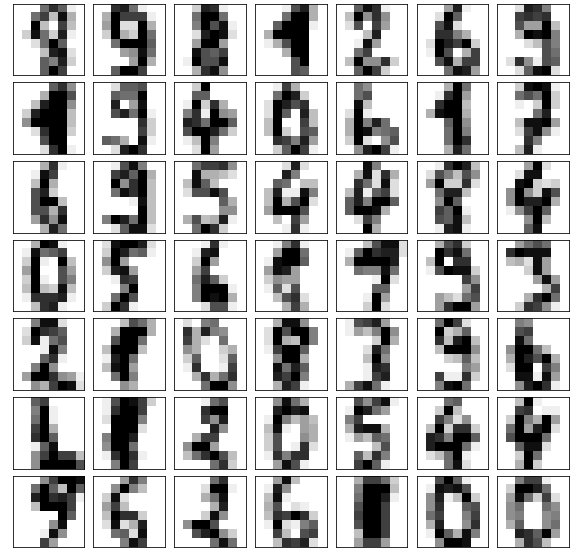

My classification of those 25 digits is:

$$\begin{matrix}
9 & 9 & 8 & 4 & 2 & 6 & 9\\
4 & 9 & 4 & 0 & 6 & 1 & 7\\
6 & 9 & 5 & 4 & 4 & 7 & 4\\
0 & 5 & 4 & 4 & 7 & 9 & 5\\
2 & 4 & 0 & 8 & 3 & 9 & 6\\
1 & 7 & 2 & 6 & 1 & 0 & 0\\
\end{matrix}$$

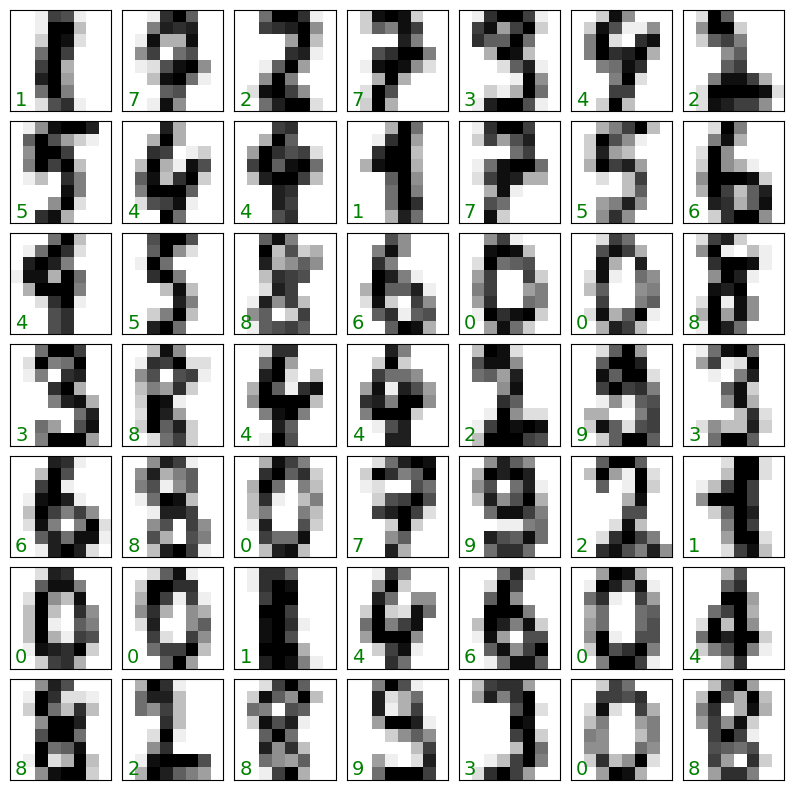

In [ ]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]),
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


In [ ]:
X , y = digits.data, digits.target
print(X,y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


In [ ]:
iso = Isomap(n_components=2)
X_transformed = iso.fit_transform(X)
X_transformed.shape

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

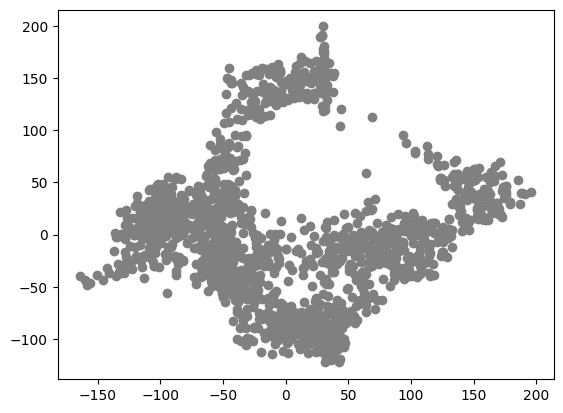

In [ ]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='gray')

In [ ]:
#help(iso)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2)

In [ ]:
print(Xtrain.shape)
print(0.8*1797)

(1437, 64)
1437.6000000000001


In [ ]:
#help(LogisticRegression)

In [ ]:
clf = LogisticRegression(solver='sag')
clf.fit(Xtrain, ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
ypred = clf.predict(Xtrain)
print(confusion_matrix(ytrain, ypred))

[[148   0   0   0   0   0   0   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0]
 [  0   0 140   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0]
 [  0   0   0   0 147   0   0   0   0   0]
 [  0   0   0   0   0 155   0   0   0   0]
 [  0   0   0   0   0   0 139   0   0   0]
 [  0   0   0   0   0   0   0 150   0   0]
 [  0   0   0   0   0   0   0   0 139   0]
 [  0   0   0   0   0   0   0   0   0 131]]


In [ ]:
ypred2 = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred2))

[[30  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  1  1]
 [ 0  2 35  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  1  0  0 31  0  0  1  0  1]
 [ 0  1  1  0  0 25  0  0  0  0]
 [ 0  1  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  3  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  0  1  0  0  1 47]]


In [ ]:
#help(accuracy_score)

In [ ]:
print(accuracy_score(ypred, ytrain))
print(accuracy_score(ypred2, ytest))

1.0
0.9527777777777777


## Exercise 2: Fun with Gamma Ray Bursts.<a class="anchor" id="five"></a>


In [ ]:
# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])

print(names)

['GRB_name' 'GRB_name_Fermi' 'T0' 'ra' 'decl' 'pos_error' 'T90'
 'T90_error' 'T90_start' 'fluence' 'fluence_error' 'redshift' "'T100'"
 'GBM_located' 'mjd_(T0)']


Text(0, 0.5, 'Fluence(erg/cm^2)')

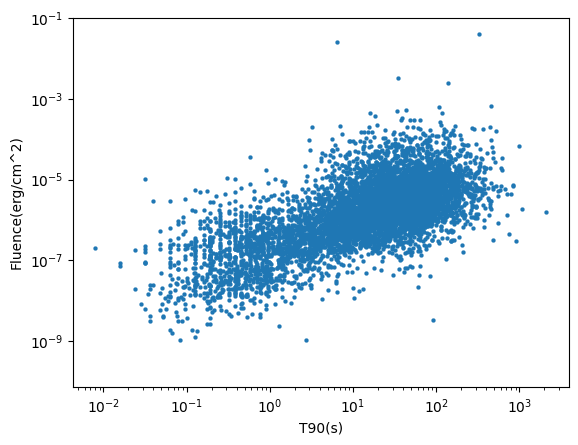

In [ ]:
T90=np.array(data[6],dtype=float)[:, None]
fluence = np.array(data[9],dtype=float)[:, None]

plt.scatter(T90,fluence, linewidth=0.1,marker='.')
plt.semilogx()
plt.semilogy()
plt.xlabel('T90(s)')
plt.ylabel('Fluence(erg/cm^2)')


[]

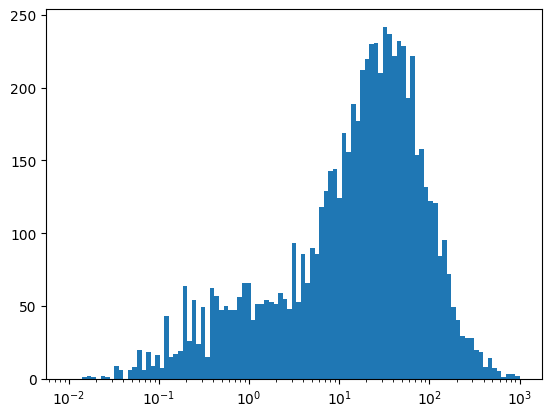

In [ ]:
_ = plt.hist(T90,bins= np.logspace(-2,3,100))
plt.semilogx()

Now its more clear we have two clusters.

<ipython-input-68-c65f4e33aca9>:6: RuntimeWarning: invalid value encountered in log10
  logT90 = np.log10(T90)


[]

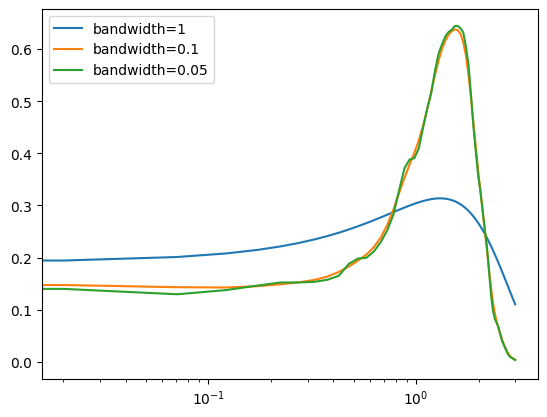

In [ ]:
def kde_sklearn(data, bandwidth = 1.0):
    kde_skl = KernelDensity(bandwidth = bandwidth).fit(data.reshape(-1,1))
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

logT90 = np.log10(T90)
logT90 = logT90[~np.isnan(logT90)]

xgrid =np.log10(np.logspace(-2,3,100))

bandwith = [1,0.1,0.05]
for b in bandwith:
  pdf = kde_sklearn(logT90,bandwidth=b)
  plt.plot(xgrid,pdf,label=f'bandwidth={b}')

plt.legend()
plt.semilogx()

In [ ]:
logT90 = logT90.reshape(-1,1)

clf = KMeans(n_clusters=2)
clf.fit(logT90)
centers = clf.cluster_centers_
labels = clf.predict(logT90)
print(10**centers)
print(labels)


[[ 0.90851106]
 [33.62262647]]
[0 0 1 ... 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
max1 = 10**max(logT90[labels==1])
min2 = 10**min(logT90[labels==0])
print(f'The maximun of short Gamma Ray Bursts is {max1}')
print(f'The minimum of long Gamma Ray Bursts is {min2}')
mean = (max1+min2)/2
print(f'The edge is {mean}')

The maximun of short Gamma Ray Bursts is [2100.]
The minimum of long Gamma Ray Bursts is [0.008]
The edge is [1050.004]


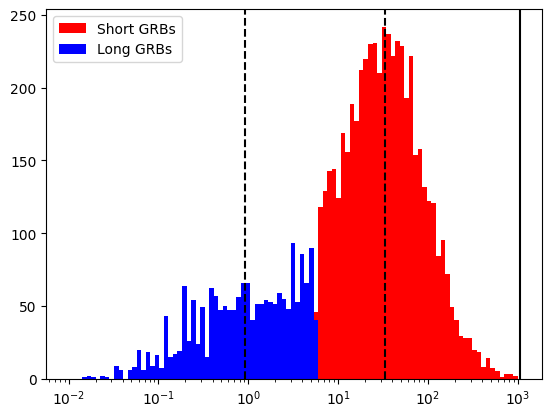

In [ ]:
_ = plt.hist(10**logT90[labels==1],bins= np.logspace(-2,3,100),color='r',label='Short GRBs')
_ = plt.hist(10**logT90[labels==0],bins= np.logspace(-2,3,100),color='b', label='Long GRBs')
plt.axvline(mean,c='black')
plt.axvline(10**centers[0], c='black',ls='--')
plt.axvline(10**centers[1], c='black',ls='--')
plt.semilogx()
plt.legend()

In [ ]:
T90=np.array(data[6],dtype=float)
fluence = np.array(data[9],dtype=float)

index = []

for i in range(len(T90)):
    if T90[i] ==0 or T90[i] == -999 or fluence[i] == 0 or fluence[i] == -999:
        index+=[i]

T90 = np.delete(T90,index)
fluence = np.delete(fluence,index)


x = []
logT90 = np.log10(T90)
logfluence = np.log10(fluence)

for i in range(len(logT90)):
    x.append([logT90[i], logfluence[i]])

X = np.array(x)
X.shape


(6980, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Fluence(erg/cm^2)')

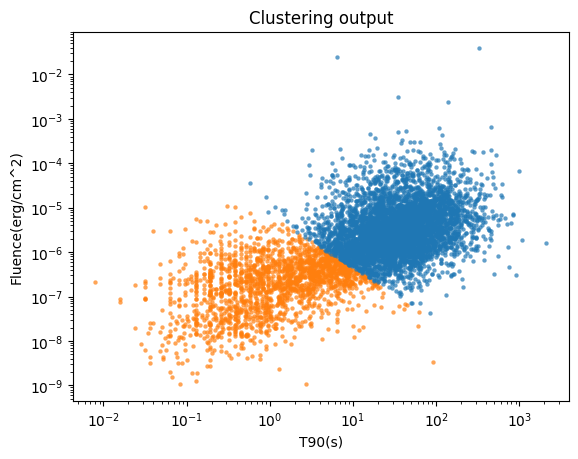

In [ ]:
clf = KMeans(n_clusters=2) #Try 2 clusters to start with
clf.fit(X)
centers = clf.cluster_centers_ #location of the clusters
labels = clf.predict(X) #labels for each of the points

# plot the data color-coded by cluster id
colors = ['C1', 'C0']
# Since we have only two clusters, we need to loop over only two labels
for ii in range(2):
    plt.scatter(10**X[labels==ii,0], 10**X[labels==ii,1],
                color=colors[ii],alpha=0.7,linewidth=0.1,marker='.')

plt.title('Clustering output')
plt.semilogx()
plt.semilogy()
plt.xlabel('T90(s)')
plt.ylabel('Fluence(erg/cm^2)')


In [ ]:
scaler = preprocessing.StandardScaler()
bandwidth = 0.8
ms = MeanShift(bandwidth=bandwidth,
               bin_seeding=True,
               cluster_all=False)
ms.fit(scaler.fit_transform(X))

MeanShift(bandwidth=0.8, bin_seeding=True, cluster_all=False)

[-1  0  1  2  3  4]
0.8
number of estimated clusters : 5


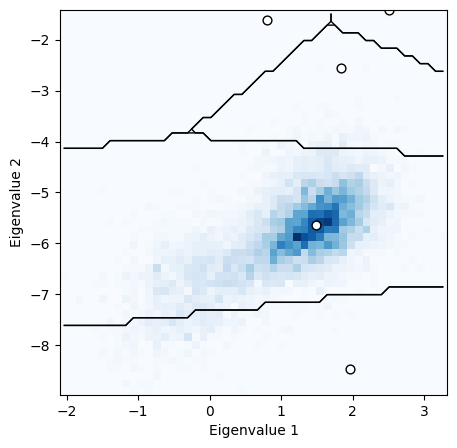

In [ ]:
labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print(bandwidth)
print("number of estimated clusters :", n_clusters)

# Make some plots
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# Compute a 2D histogram  of the input
H, xedges, yedges = np.histogram2d(X[:,0], X[:,1], 50)

# plot density
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues')

# plot cluster centers
cluster_centers = scaler.inverse_transform(ms.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')

    H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))

ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

plt.show()